6.12.2020

### Image Processing in Physics

#### Julia Herzen, Klaus Achterhold, Clemens Schmid, Manuel Schultheiss

# Exercise 05 -- A: Noise spectra

The goal of this exercise is to analyze noise. It's split into two 
short subtasks. First, you create noise, transform it and investigate the 
influence of the transformation on the noise power spectrum and spatial 
correlation. Secondly, you load an image and investigate its signal power.
When adding noise, this signal power changes. 

You need to replace the ??? in the code with the required commands.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd

%matplotlib notebook
plt.rcParams["image.cmap"] = "gray"
plt.rcParams["image.interpolation"] = "none"

### Part 1: Noise and correlation

Create noise, and calculate its noise power spectrum and correlation

Create a 100x100 array of Gaussian noise with $\mu = 0$ and $\sigma = 0.1$. Use the function `np.random.normal`.

In [2]:
M = 100
white_noise = np.random.normal(0, 0.1, (M, M))

Use `nd.gaussian_filter` to create a low and high pass filtered version of your noise. Play around with the kernel sigma for the filtering and investigate the impact on the noise power and spatial correlation. 

Hint: A high pass can be modelled as the original image minus the low pass image.

In [3]:
low_pass = nd.gaussian_filter(white_noise, 1)
high_pass = white_noise - low_pass

Plot the filtered images in spatial domain:

<IPython.core.display.Javascript object>


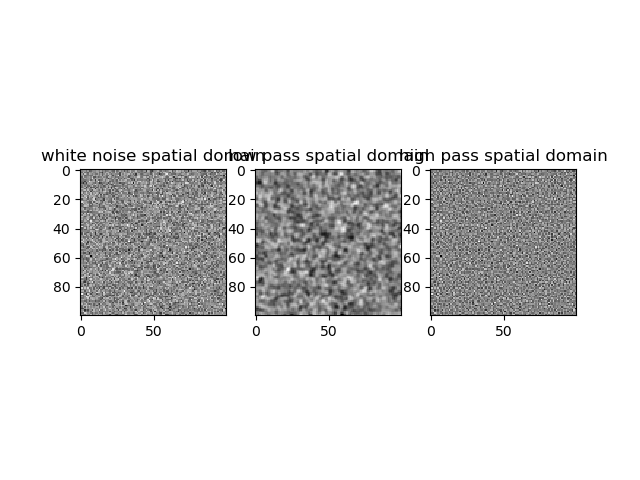

Text(0.5, 1.0, 'high pass spatial domain')

In [4]:
plt.figure()
plt.subplot(131)
plt.imshow(white_noise)
plt.title('white noise spatial domain')
plt.subplot(132)
plt.imshow(low_pass)
plt.title('low pass spatial domain')
plt.subplot(133)
plt.imshow(high_pass)
plt.title('high pass spatial domain')

Now we calculate the noise power spectrum of each noise image. Strictly speaking, we only look at the power spectrum of one single realization of our noise instead of the expectation value. Visually, this is sufficient.

The noise power spectrum $S(w)$ of a signal $f(x)$ is $S(w) = | F (w) |^2$. 

In [5]:
nps_white = np.abs(np.fft.fft2(white_noise))**2
nps_low = np.abs(np.fft.fft2(low_pass))**2
nps_high = np.abs(np.fft.fft2(high_pass))**2

Visualize the noise power spectrum in frequency domain. Don't forget to take care of the coordinate origin.

<IPython.core.display.Javascript object>


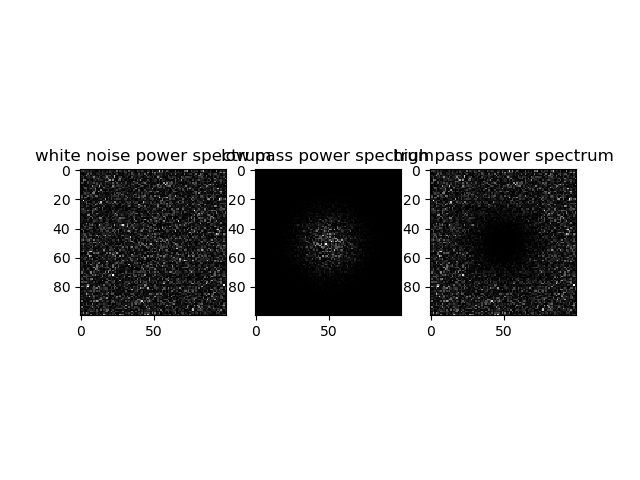

Text(0.5, 1.0, 'high pass power spectrum')

In [6]:
plt.figure()
plt.subplot(131)
plt.imshow(np.fft.fftshift(nps_white))
plt.title('white noise power spectrum')
plt.subplot(132)
plt.imshow(np.fft.fftshift(nps_low))
plt.title('low pass power spectrum')
plt.subplot(133)
plt.imshow(np.fft.fftshift(nps_high))
plt.title('high pass power spectrum')

Calculate the autocorrelation of the noise images in spatial domain. 

What do you expect? How is the power spectrum in Fourier space connected to autocorrelation in spatial domain?

In [7]:
corr_white = nd.correlate(white_noise, white_noise)
corr_low = nd.correlate(low_pass, low_pass)
corr_high = nd.correlate(high_pass, high_pass)

Visualize the noise autocorrelation in spatial domain. 

<IPython.core.display.Javascript object>


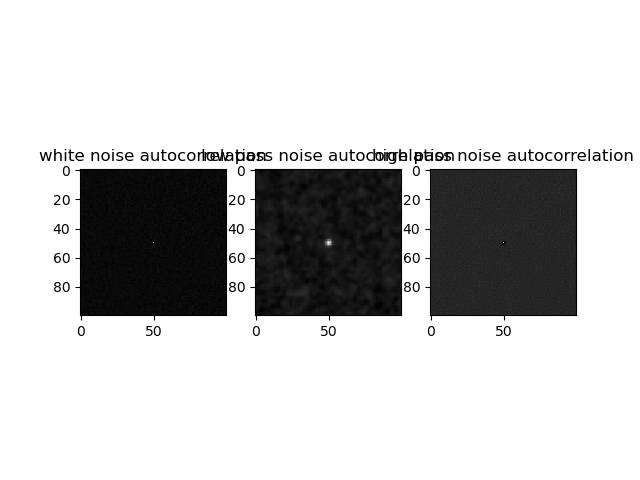

Text(0.5, 1.0, 'high pass noise autocorrelation')

In [12]:
plt.figure()
plt.subplot(131)
plt.imshow(corr_white)
plt.title('white noise autocorrelation')
plt.subplot(132)
plt.imshow(corr_low)
plt.title('low pass noise autocorrelation')
plt.subplot(133)
plt.imshow(corr_high)
plt.title('high pass noise autocorrelation')

<IPython.core.display.Javascript object>


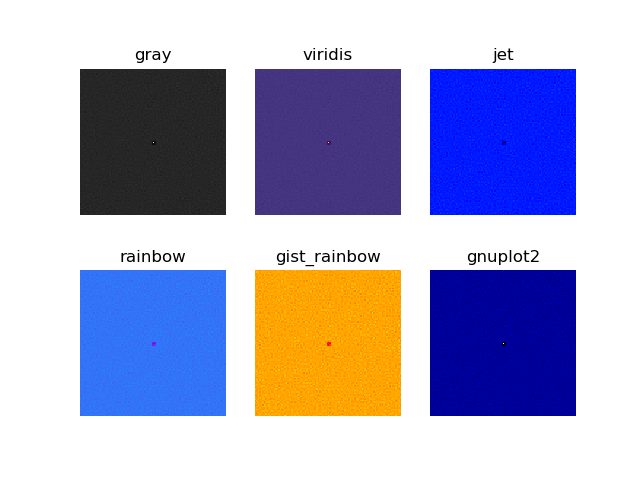

In [13]:
fig, ax = plt.subplots(2, 3)
cmaps = ["gray", "viridis", "jet", "rainbow", "gist_rainbow", "gnuplot2"]
for i, cm in enumerate(cmaps):
    a = ax.ravel()[i]
    a.imshow(corr_high, cmap=cm)
    a.set_title(cm)
    a.set_axis_off()

<IPython.core.display.Javascript object>


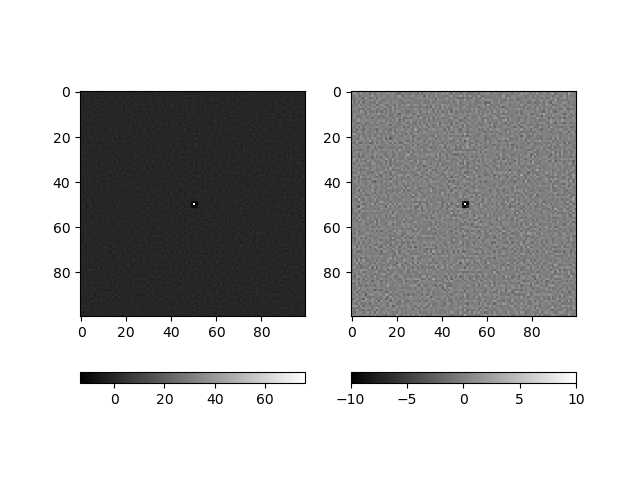

In [14]:
plt.figure()
plt.subplot(121)
plt.imshow(corr_high)
plt.colorbar(orientation="horizontal")
plt.subplot(122)
plt.imshow(corr_high, vmin=-10, vmax=10)
plt.colorbar(orientation="horizontal")

<IPython.core.display.Javascript object>


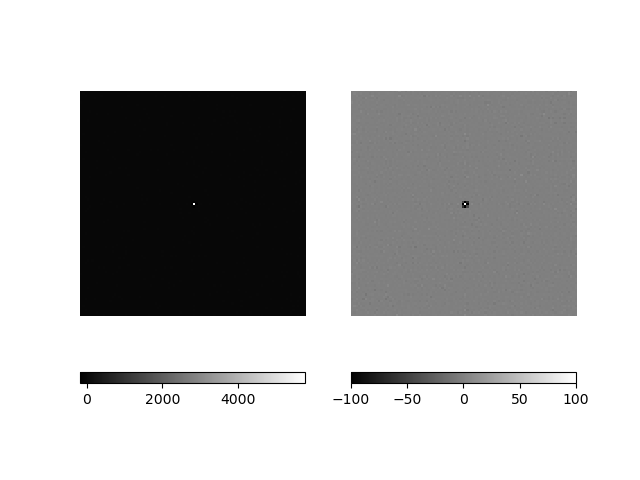

(-0.5, 99.5, 99.5, -0.5)

In [15]:
plt.figure()
plt.subplot(121)
plt.imshow(corr_high**2 * np.sign(corr_high))
plt.colorbar(orientation="horizontal")
plt.axis("off")
plt.subplot(122)
plt.imshow(corr_high**2 * np.sign(corr_high), vmin=-100, vmax=100)
plt.colorbar(orientation="horizontal")
plt.axis("off")

The auto-correlation tells you the correlation between two pixels as a
function of the distance between those pixels.
- For white noise, the correlation is only nonzero if the distance is zero, else there is no
correlation between pixels. We used `np.random.normal`, which generates a value for each pixel independently.
- For the low-pass noise, there is a correlation in the neighborhood of each pixel due to the "patchy" character of the noise. The correlation falls off quickly with increasing distance. This is related to the size of the gaussian filter we used.
- The high-pass noise exhibits anti-correlation in its immediate neighbourhood $\Rightarrow$ You **know** that a pixel will be different from its neighbor due to the "fast" changes in the noise.

### Part 2: Analyzing image noise

Read in the image world and average over the color channels as it has colors.

<IPython.core.display.Javascript object>


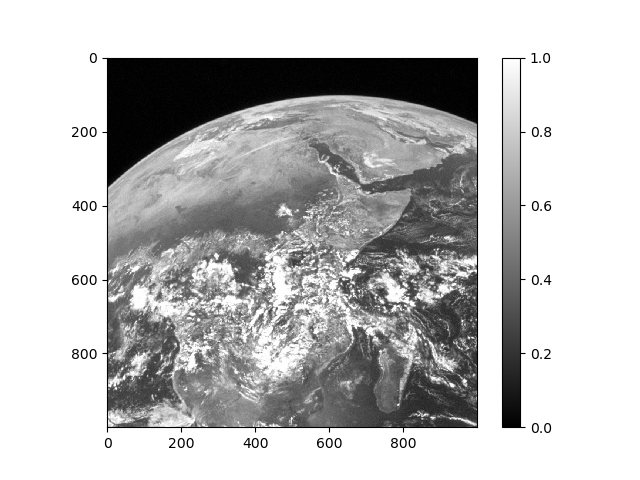

In [16]:
img = plt.imread('world.jpg') / 255.
img = img.mean(-1)

plt.figure()
plt.imshow(img)
plt.colorbar()

Create uncorrelated noise in the shape of the image with the same mean and standard deviation as before. 

In [17]:
noise = np.random.normal(0, 0.1, img.shape)

Calculate the **one-dimensional** signal power spectrum of the unchanged image, the white noise, and the image with the noise. (FT horizontally or vertically)

Use the real valued `rfft` function, which neglects the mirror frequencies.

In [18]:
sps = np.abs(np.fft.rfft(img, axis=0))**2
nps = np.abs(np.fft.rfft(noise, axis=0))**2
sps_with_noise = np.abs(np.fft.rfft(img + noise, axis=0))**2

This creates the positive valued frequencies corresponding to the power of the `rfft` used above.

In [19]:
freq = np.fft.rfftfreq(img.shape[0])

Visualize the noise power spectra.

You computed the power spectra before in **1D**, so for every line / column. For plotting, mean over all columns / over all lines respectively, to get a line matching the shape of `freq`.

<IPython.core.display.Javascript object>


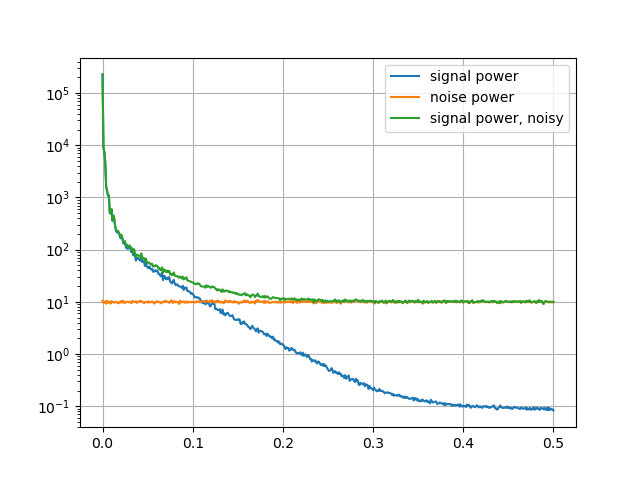

In [20]:
plt.figure()
plt.semilogy(freq, np.mean(sps, axis=1), label='signal power')
plt.semilogy(freq, np.mean(nps, axis=1), label='noise power')
plt.semilogy(freq, np.mean(sps_with_noise, axis=1), label='signal power, noisy')
plt.grid(True)
plt.legend()

Assuming white noise, the noise power can be estimated easily from the high frequencies of the combined image. This entails that highest frequencies do not contain much structure in the original image.

<IPython.core.display.Javascript object>


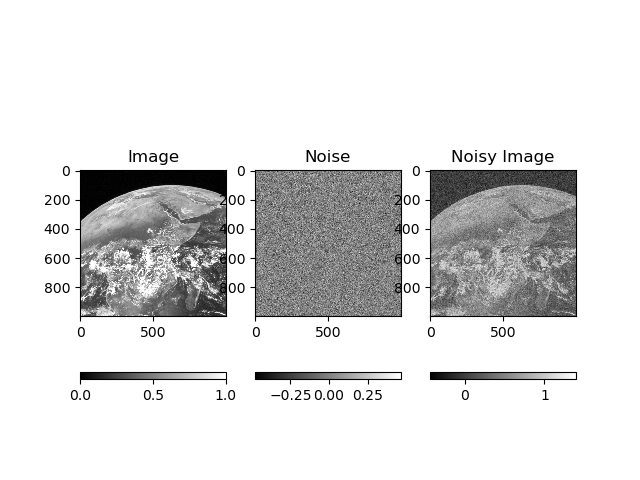

Text(0.5, 1.0, 'Noisy Image')

In [21]:
plt.figure()
plt.subplot(131)
plt.imshow(img)
plt.colorbar(orientation="horizontal")
plt.title("Image")
plt.subplot(132)
plt.imshow(noise)
plt.colorbar(orientation="horizontal")
plt.title("Noise")
plt.subplot(133)
plt.imshow(img + noise)
plt.colorbar(orientation="horizontal")
plt.title("Noisy Image")